# Fraud detection in gas and electricity

## Import data

In [1]:
# import all modules needed
from models.eda import load_data, clean_data


import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def clean_data(df):
    print("Cleaning DataFrame...")
    print("Printing Head of DataFrame:")
    display(df.head())
    
    print("Cleaning DataFrame...")
    print("Printing Tail of DataFrame:")
    display(df.tail())
    
    print("Printing Info of DataFrame:")
    display(df.info())
    
    print("Printing Sum of Null Values in DataFrame:")
    display(df.isnull().sum())
    
    display("Loaded DataFrame with shape:", df.shape)

In [3]:
df_client_train = load_data('data/train/client_train.csv')

df_client_train['creation_date'] = pd.to_datetime(df_client_train['creation_date'])

clean_data(df_client_train)

Cleaning DataFrame...
Printing Head of DataFrame:


,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,1994-12-31,0.0
1,69,train_Client_1,11,107,2002-05-29,0.0
2,62,train_Client_10,11,301,1986-03-13,0.0
3,69,train_Client_100,11,105,1996-11-07,0.0
4,62,train_Client_1000,11,303,2014-10-14,0.0


Cleaning DataFrame...
Printing Tail of DataFrame:


,disrict,client_id,client_catg,region,creation_date,target
135488,62,train_Client_99995,11,304,2004-07-26,0.0
135489,63,train_Client_99996,11,311,2012-10-25,0.0
135490,63,train_Client_99997,11,311,2011-11-22,0.0
135491,60,train_Client_99998,11,101,1993-12-22,0.0
135492,60,train_Client_99999,11,101,1986-02-18,0.0


Printing Info of DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   disrict        135493 non-null  int64         
 1   client_id      135493 non-null  object        
 2   client_catg    135493 non-null  int64         
 3   region         135493 non-null  int64         
 4   creation_date  135493 non-null  datetime64[ns]
 5   target         135493 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 6.2+ MB


None

Printing Sum of Null Values in DataFrame:


disrict          0
client_id        0
client_catg      0
region           0
creation_date    0
target           0
dtype: int64

'Loaded DataFrame with shape:'

(135493, 6)

In [4]:
# Check if any rows in the 'target' column are duplicated
duplicated_rows = df_client_train['target'].value_counts()

# Print the duplicated rows
print(duplicated_rows)

0.0    127927
1.0      7566
Name: target, dtype: int64


In [5]:
# Check if any rows in the 'client_id' column are duplicated
duplicated_rows = df_client_train['client_id'].value_counts()

# Print the duplicated rows
#print(duplicated_rows[duplicated_rows > 1])
print(duplicated_rows)

train_Client_0        1
train_Client_59347    1
train_Client_5936     1
train_Client_59359    1
train_Client_59358    1
                     ..
train_Client_18697    1
train_Client_18696    1
train_Client_18695    1
train_Client_18694    1
train_Client_99999    1
Name: client_id, Length: 135493, dtype: int64


In [6]:
# Check if any rows in the 'disrict' column are duplicated
duplicated_rows = df_client_train['disrict'].value_counts()

# Print the duplicated rows
print(duplicated_rows)

62    40353
69    34231
60    31922
63    28987
Name: disrict, dtype: int64


In [7]:
# Check if any rows in the 'client_catg' column are duplicated
duplicated_rows = df_client_train['client_catg'].value_counts()

# Print the duplicated rows
print(duplicated_rows)

11    131494
12      2321
51      1678
Name: client_catg, dtype: int64


In [8]:
df_invoice_train = load_data('data/train/invoice_train.csv')
df_invoice_train['invoice_date'] = pd.to_datetime(df_invoice_train['invoice_date'])

clean_data(df_invoice_train)

/var/folders/8x/cz487gy55dx6vlxs84h83w7h0000gn/T/ipykernel_98811/3402235832.py:1: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  df_invoice_train = load_data('data/train/invoice_train.csv')


Cleaning DataFrame...
Printing Head of DataFrame:


,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


Cleaning DataFrame...
Printing Tail of DataFrame:


,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
4476744,train_Client_99998,2005-08-19,10,1253571,0,202,9,1,400,135,0,0,3197,3732,8,ELEC
4476745,train_Client_99998,2005-12-19,10,1253571,0,202,6,1,200,6,0,0,3732,3938,4,ELEC
4476746,train_Client_99999,1996-09-25,11,560948,0,203,6,1,259,0,0,0,13884,14143,4,ELEC
4476747,train_Client_99999,1996-05-28,11,560948,0,203,6,1,603,0,0,0,13281,13884,4,ELEC
4476748,train_Client_99999,1996-01-25,11,560948,0,203,6,1,516,0,0,0,12765,13281,4,ELEC


Printing Info of DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype         
---  ------                -----         
 0   client_id             object        
 1   invoice_date          datetime64[ns]
 2   tarif_type            int64         
 3   counter_number        int64         
 4   counter_statue        object        
 5   counter_code          int64         
 6   reading_remarque      int64         
 7   counter_coefficient   int64         
 8   consommation_level_1  int64         
 9   consommation_level_2  int64         
 10  consommation_level_3  int64         
 11  consommation_level_4  int64         
 12  old_index             int64         
 13  new_index             int64         
 14  months_number         int64         
 15  counter_type          object        
dtypes: datetime64[ns](1), int64(12), object(3)
memory usage: 546.5+ MB


None

Printing Sum of Null Values in DataFrame:


client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

'Loaded DataFrame with shape:'

(4476749, 16)

In [9]:
# Check if any rows in the 'counter number' column are duplicated
duplicated_rows = df_invoice_train['counter_number'].value_counts()

# Print the duplicated rows
print(duplicated_rows)

0                43161
2786               251
630317             230
162709             226
963                220
                 ...  
4920158              1
431951               1
2188701271500        1
508843               1
375249               1
Name: counter_number, Length: 201893, dtype: int64


In [10]:
# Check if any rows in the 'counter code' column are duplicated
duplicated_rows = df_invoice_train['counter_code'].value_counts()

# Print the duplicated rows
print(duplicated_rows)

203    1516836
5      1352035
207     555628
413     378917
202     343251
420      98273
410      69080
433      34447
10       27744
442      17050
25       14934
407      13768
204      12427
453       8290
201       7672
467       7302
506       3389
483       2830
214       2643
40        2482
532       1982
565       1082
403       1070
450       1059
600        807
210        789
102        313
227        178
65          74
101         74
16          73
310         51
307         50
305         44
222         42
0           33
317         16
303          5
333          4
367          3
325          1
1            1
Name: counter_code, dtype: int64


In [11]:
# Check if any rows in the 'counter type' column are duplicated
duplicated_rows = df_invoice_train['counter_type'].value_counts()

# Print the duplicated rows
print(duplicated_rows)

ELEC    3079406
GAZ     1397343
Name: counter_type, dtype: int64


In [12]:
# Check if any rows in the 'client id' column are duplicated
duplicated_rows = df_invoice_train['client_id'].value_counts()

# Print the duplicated rows
print(duplicated_rows)

train_Client_116878    439
train_Client_9263      380
train_Client_130245    327
train_Client_59131     317
train_Client_61728     310
                      ... 
train_Client_23589       1
train_Client_8426        1
train_Client_49342       1
train_Client_114075      1
train_Client_27751       1
Name: client_id, Length: 135493, dtype: int64


In [13]:
# Merge the two DataFrames on the client_id, using the default inner join
merged_df_train = pd.merge(df_client_train, df_invoice_train, on='client_id')

In [14]:
# Create dummy variables for the counter_type column
dummy_vars = pd.get_dummies(merged_df_train['counter_type'], prefix='counter_type')

# Add the dummy variables to your dataframe
merged_df_train = pd.concat([merged_df_train, dummy_vars], axis=1)

# Drop the original counter_type column
merged_df_train.drop('counter_type', axis=1, inplace=True)

In [15]:
# Print the merged DataFrame
clean_data(merged_df_train)

Cleaning DataFrame...
Printing Head of DataFrame:


,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type_ELEC,counter_type_GAZ
0,60,train_Client_0,11,101,1994-12-31,0.0,2014-03-24,11,1335667,0,...,1,82,0,0,0,14302,14384,4,1,0
1,60,train_Client_0,11,101,1994-12-31,0.0,2013-03-29,11,1335667,0,...,1,1200,184,0,0,12294,13678,4,1,0
2,60,train_Client_0,11,101,1994-12-31,0.0,2015-03-23,11,1335667,0,...,1,123,0,0,0,14624,14747,4,1,0
3,60,train_Client_0,11,101,1994-12-31,0.0,2015-07-13,11,1335667,0,...,1,102,0,0,0,14747,14849,4,1,0
4,60,train_Client_0,11,101,1994-12-31,0.0,2016-11-17,11,1335667,0,...,1,572,0,0,0,15066,15638,12,1,0


Cleaning DataFrame...
Printing Tail of DataFrame:


,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type_ELEC,counter_type_GAZ
4476744,60,train_Client_99998,11,101,1993-12-22,0.0,2005-08-19,10,1253571,0,...,1,400,135,0,0,3197,3732,8,1,0
4476745,60,train_Client_99998,11,101,1993-12-22,0.0,2005-12-19,10,1253571,0,...,1,200,6,0,0,3732,3938,4,1,0
4476746,60,train_Client_99999,11,101,1986-02-18,0.0,1996-09-25,11,560948,0,...,1,259,0,0,0,13884,14143,4,1,0
4476747,60,train_Client_99999,11,101,1986-02-18,0.0,1996-05-28,11,560948,0,...,1,603,0,0,0,13281,13884,4,1,0
4476748,60,train_Client_99999,11,101,1986-02-18,0.0,1996-01-25,11,560948,0,...,1,516,0,0,0,12765,13281,4,1,0


Printing Info of DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4476749 entries, 0 to 4476748
Data columns (total 22 columns):
 #   Column                Dtype         
---  ------                -----         
 0   disrict               int64         
 1   client_id             object        
 2   client_catg           int64         
 3   region                int64         
 4   creation_date         datetime64[ns]
 5   target                float64       
 6   invoice_date          datetime64[ns]
 7   tarif_type            int64         
 8   counter_number        int64         
 9   counter_statue        object        
 10  counter_code          int64         
 11  reading_remarque      int64         
 12  counter_coefficient   int64         
 13  consommation_level_1  int64         
 14  consommation_level_2  int64         
 15  consommation_level_3  int64         
 16  consommation_level_4  int64         
 17  old_index             int64         
 18  new_index     

None

Printing Sum of Null Values in DataFrame:


disrict                 0
client_id               0
client_catg             0
region                  0
creation_date           0
target                  0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type_ELEC       0
counter_type_GAZ        0
dtype: int64

'Loaded DataFrame with shape:'

(4476749, 22)

In [16]:
print(merged_df_train['client_id'].unique())
print(merged_df_train['client_id'].nunique())

['train_Client_0' 'train_Client_1' 'train_Client_10' ...
 'train_Client_99997' 'train_Client_99998' 'train_Client_99999']
135493


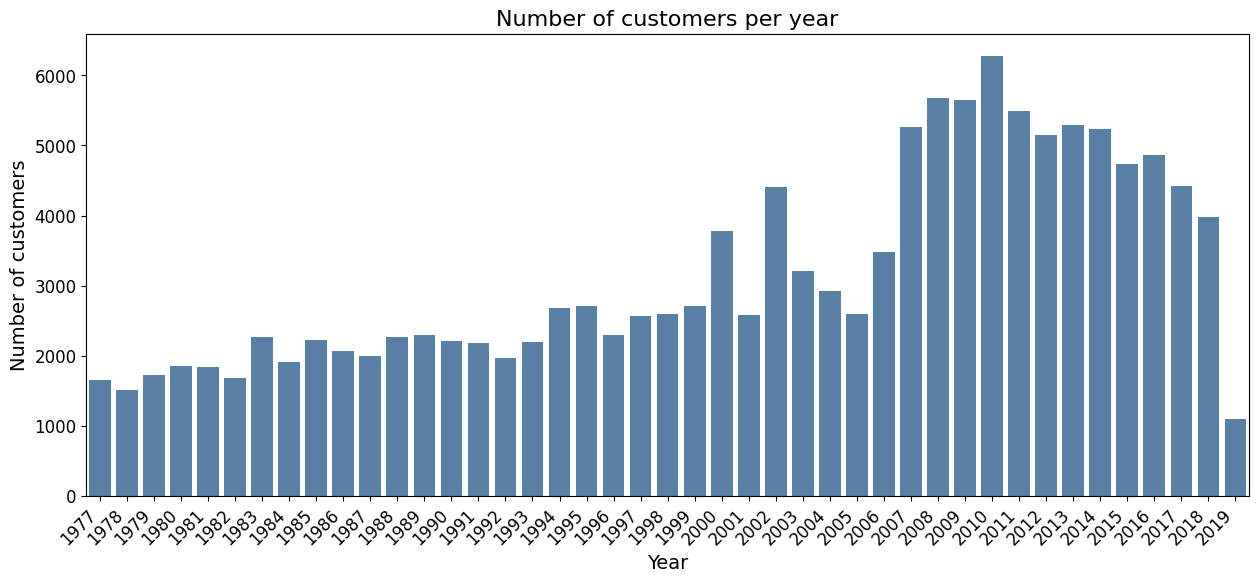

In [17]:
# Group the data by year
yearly_clients = merged_df_train.groupby(pd.Grouper(key='creation_date', freq='Y'))['client_id'].nunique().reset_index()

# Plot the results
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='creation_date', y='client_id', data=yearly_clients, ax=ax, color='steelblue', saturation=0.7, ci=None)

# Customize the plot
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Number of customers', fontsize=14)
ax.set_xticklabels(yearly_clients['creation_date'].dt.strftime('%Y'), rotation=45, ha='right', fontsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_title('Number of customers per year', fontsize=16)

plt.show()

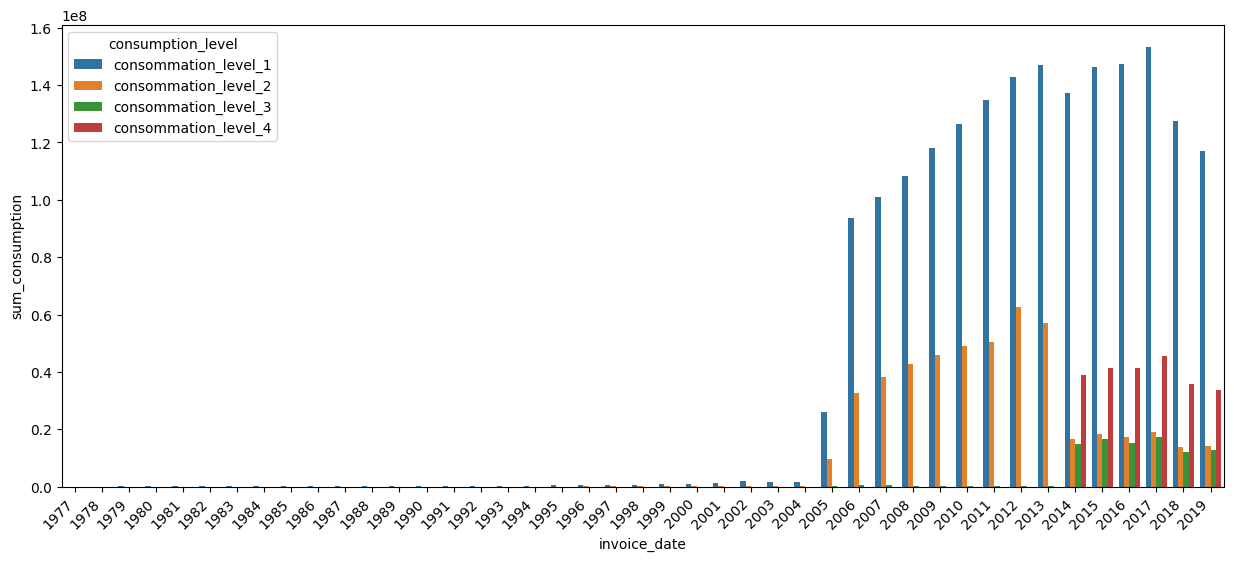

In [18]:
# Group the data by year and sum the consumption levels
df_yearly = merged_df_train.groupby(merged_df_train['invoice_date'].dt.year).agg({'consommation_level_1': 'sum', 'consommation_level_2': 'sum',
                                                         'consommation_level_3': 'sum', 'consommation_level_4': 'sum'})

# Reset the index
df_yearly = df_yearly.reset_index()

# Melt the data to create a 'variable' column for the different consumption levels
df_yearly = pd.melt(df_yearly, id_vars=['invoice_date'], var_name='consumption_level', value_name='sum_consumption')

# Plot the barplot
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=df_yearly, x='invoice_date', y='sum_consumption', hue='consumption_level')

# Set the x-label to be rotated by 45 degrees and larger width
plt.xticks(rotation=45, ha='right', fontsize=10)

# Show the plot
plt.show()

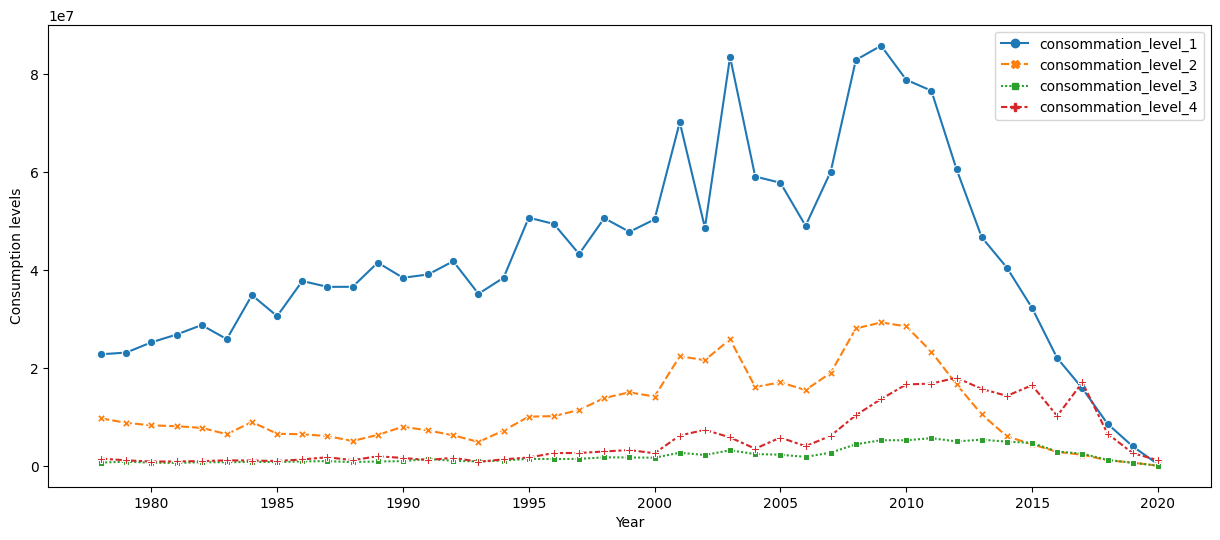

In [19]:
# Create a new dataframe with just the relevant columns
consumption_df = merged_df_train[['creation_date', 'consommation_level_1', 'consommation_level_2', 'consommation_level_3', 'consommation_level_4']].copy()

# Set the creation_date column as the index
consumption_df.set_index('creation_date', inplace=True)

# Resample the data by year and sum the consumption levels
yearly_consumption_df = consumption_df.resample('Y').sum()

# Plot the data
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=yearly_consumption_df, markers=True)

# Set the x-axis label
plt.xlabel('Year')

# Set the y-axis label
plt.ylabel('Consumption levels')

# Show the plot
plt.show()

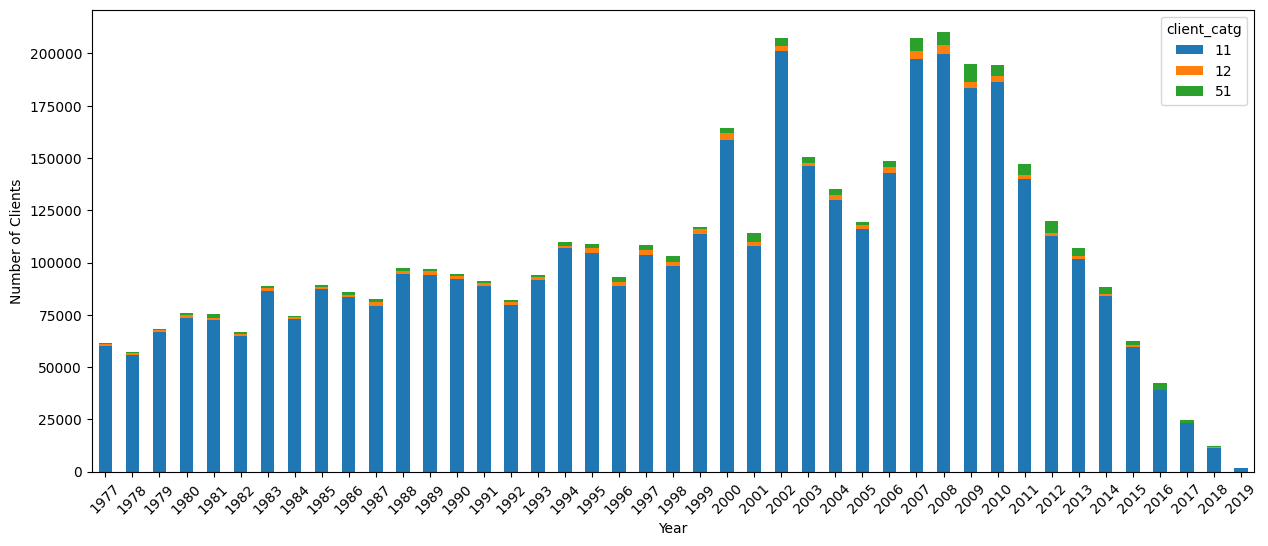

In [20]:
# Assuming your DataFrame is named 'df'
# Extract the year from the creation_date column
merged_df_train['year'] = pd.DatetimeIndex(merged_df_train['creation_date']).year

# Create a pivot table to count the number of clients in each category for each year
pivot_table = pd.pivot_table(data=merged_df_train, values='client_id', index='year', columns='client_catg', aggfunc='count')

# Plot the pivot table as a stacked bar chart
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(15, 6))

# Set the x-axis label to 'Year' and rotate the tick labels at a 45-degree angle
ax.set_xlabel('Year')
plt.xticks(rotation=45)

# Set the y-axis label to 'Number of Clients'
ax.set_ylabel('Number of Clients')

# Show the plot
plt.show()

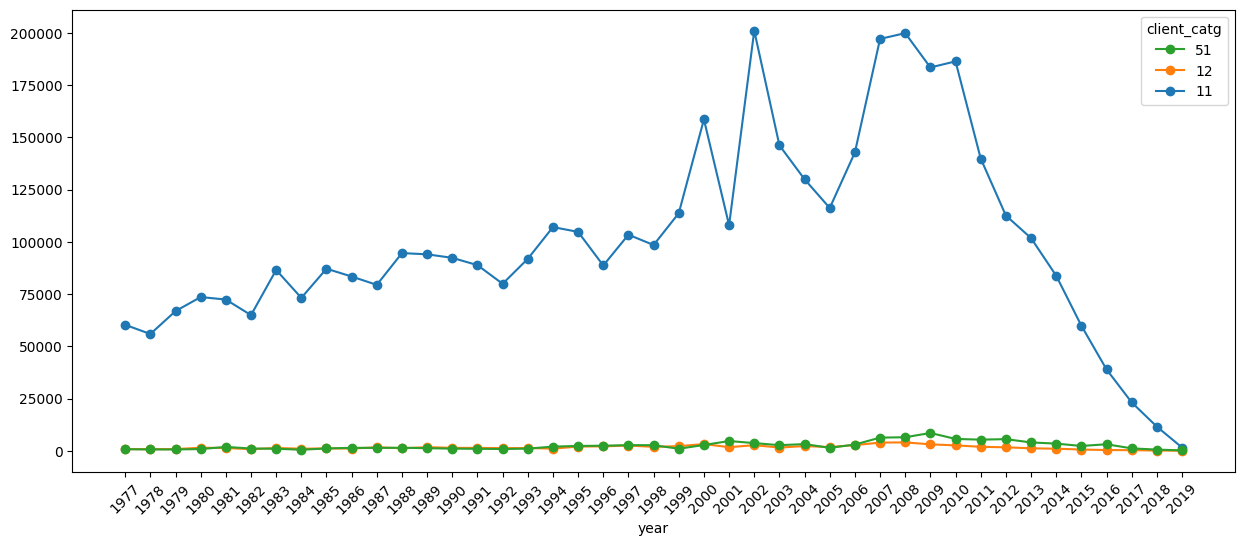

In [21]:
# Extract the year from the creation_date column
merged_df_train['year'] = merged_df_train['creation_date'].dt.year

# Group by the year and client_catg columns, and count the occurrences
counts = merged_df_train.groupby(['year', 'client_catg'])['client_id'].count().reset_index()

# Pivot the DataFrame to make the client_catg values become columns
pivot_df = counts.pivot(index='year', columns='client_catg', values='client_id')

# Plot the resulting DataFrame
ax = pivot_df.plot(kind='line', legend='reverse', figsize=(15, 6), marker='o')
ax.set_xticks(pivot_df.index)
ax.set_xticklabels(pivot_df.index, rotation=45)
plt.show()




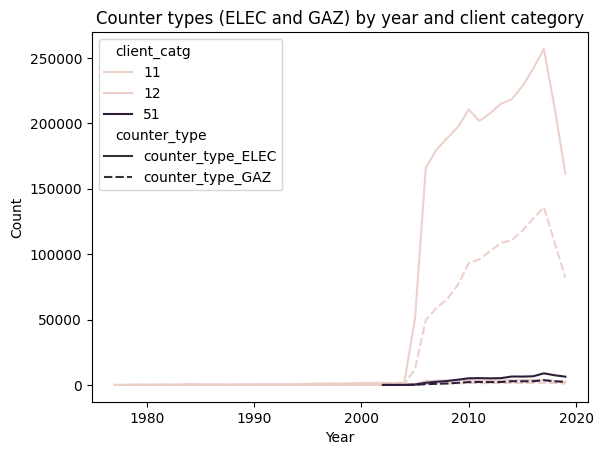

In [28]:

# create a copy of the original dataframe
df_copy = merged_df_train.copy()

# extract the year from the 'invoice_date' column
df_copy['year'] = df_copy['invoice_date'].dt.year

# create a new dataframe with only the columns of interest
df_plot = df_copy[['year', 'client_catg', 'counter_type_ELEC', 'counter_type_GAZ']]

# group the dataframe by year and client category, and sum the values
df_plot = df_plot.groupby(['year', 'client_catg']).sum().reset_index()

# melt the dataframe to create a 'variable' column with the counter types
df_plot = df_plot.melt(id_vars=['year', 'client_catg'], var_name='counter_type', value_name='count')

# filter the dataframe to only include the two counter types of interest
df_plot = df_plot[df_plot['counter_type'].isin(['counter_type_ELEC', 'counter_type_GAZ'])]

# plot the data using seaborn
sns.lineplot(data=df_plot, x='year', y='count', hue='client_catg', style='counter_type')

# set the title and axis labels
plt.title('Counter types (ELEC and GAZ) by year and client category')
plt.xlabel('Year')
plt.ylabel('Count')

# display the plot
plt.show()



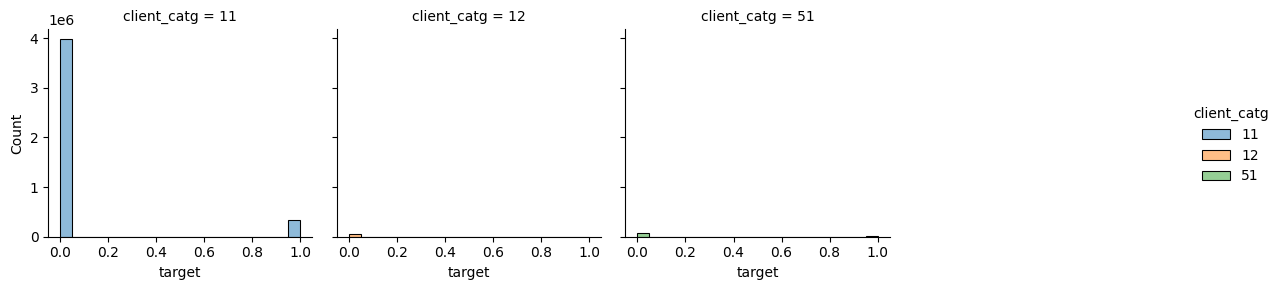

In [41]:

# Create a FacetGrid with the client_catg variable on the x-axis and target on the y-axis
g = sns.FacetGrid(data=merged_df_train, col="client_catg", hue="client_catg", col_wrap=4)

# Map a histogram plot of the target variable to the FacetGrid
g.map(sns.histplot, "target", alpha=0.5, bins=20)

# Add a legend for the client categories
g.add_legend()

# Show the plot
plt.show()




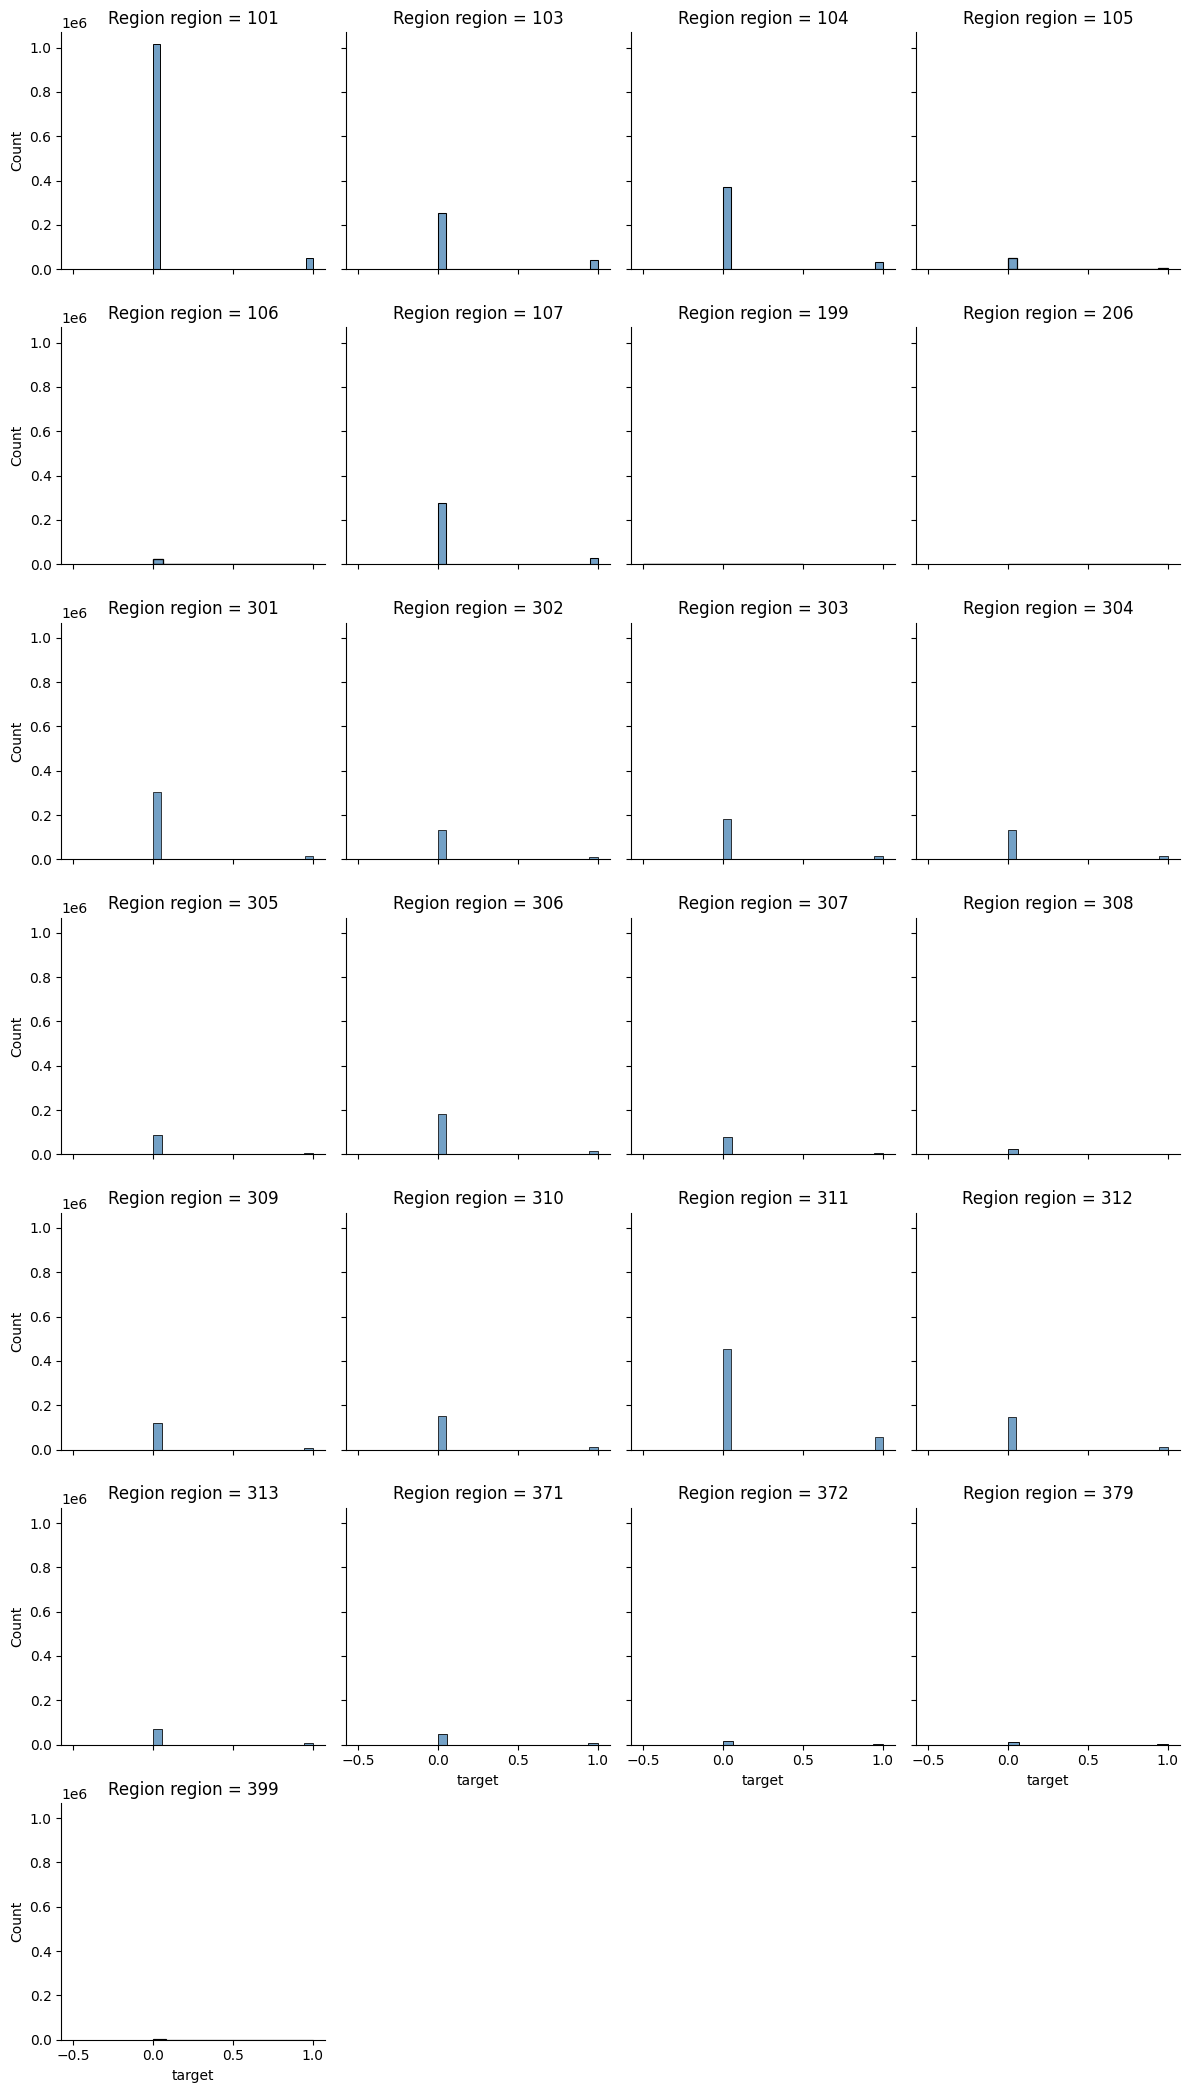

In [47]:

# Create a FacetGrid object with the data
g = sns.FacetGrid(data=merged_df_train, col="region", col_wrap=4)

# Map the Target variable to a histogram in each panel with different colors
g.map(sns.histplot, "target", color="steelblue")

# Set the title for each panel based on the region
for ax in g.axes.flat:
    ax.set_title(f"Region {ax.get_title()}")

# Show the plot
plt.show()



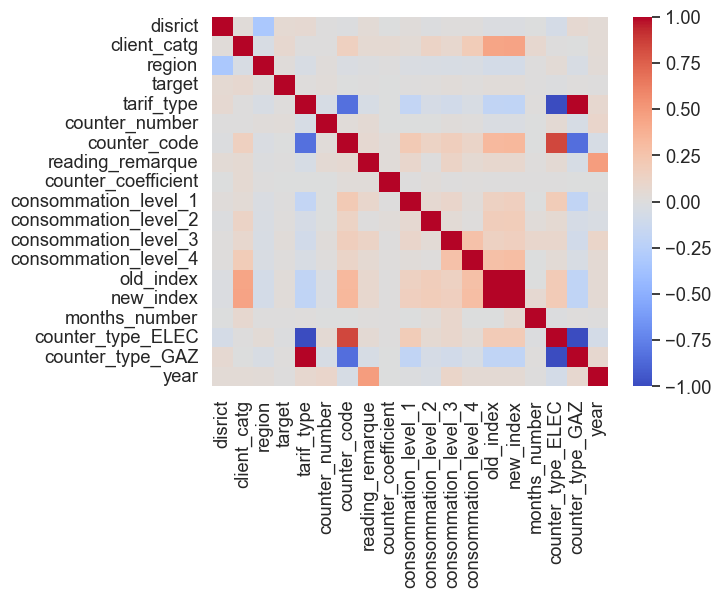

In [77]:


# Calculate the correlation matrix
corr_matrix = merged_df_train.corr()

# Plot the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')

# Show the plot
plt.show()


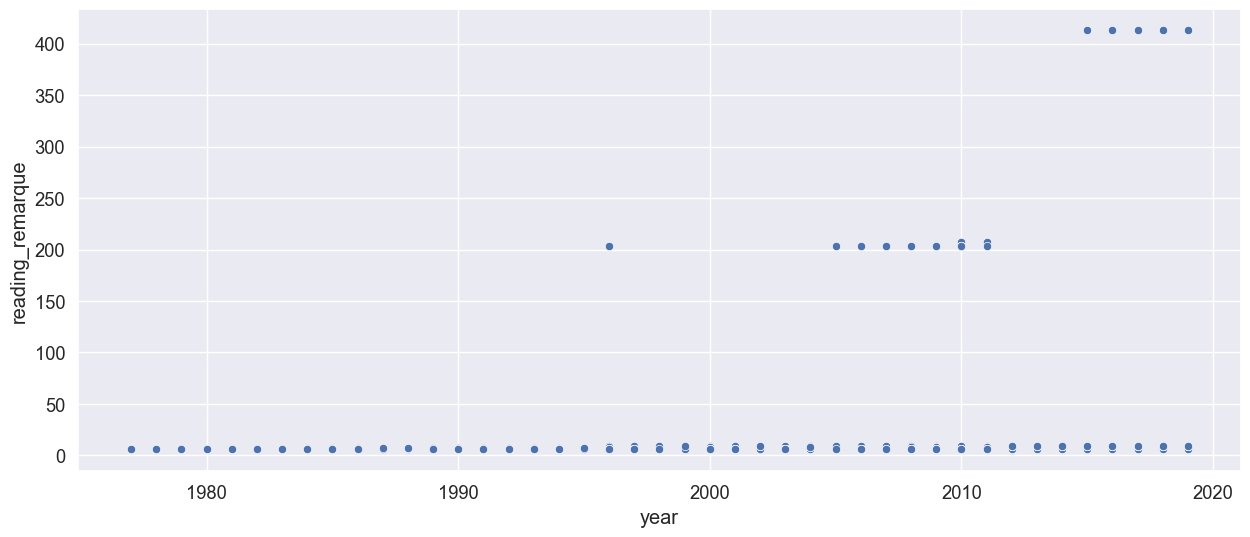

In [73]:

# Extract year from invoice_date column
merged_df_train['year'] = merged_df_train['invoice_date'].dt.year

# Create scatter plot
fig, ax = plt.subplots(figsize=(15, 6))
sns.scatterplot(data=merged_df_train, x='year', y='reading_remarque')

# Show the plot
plt.show()



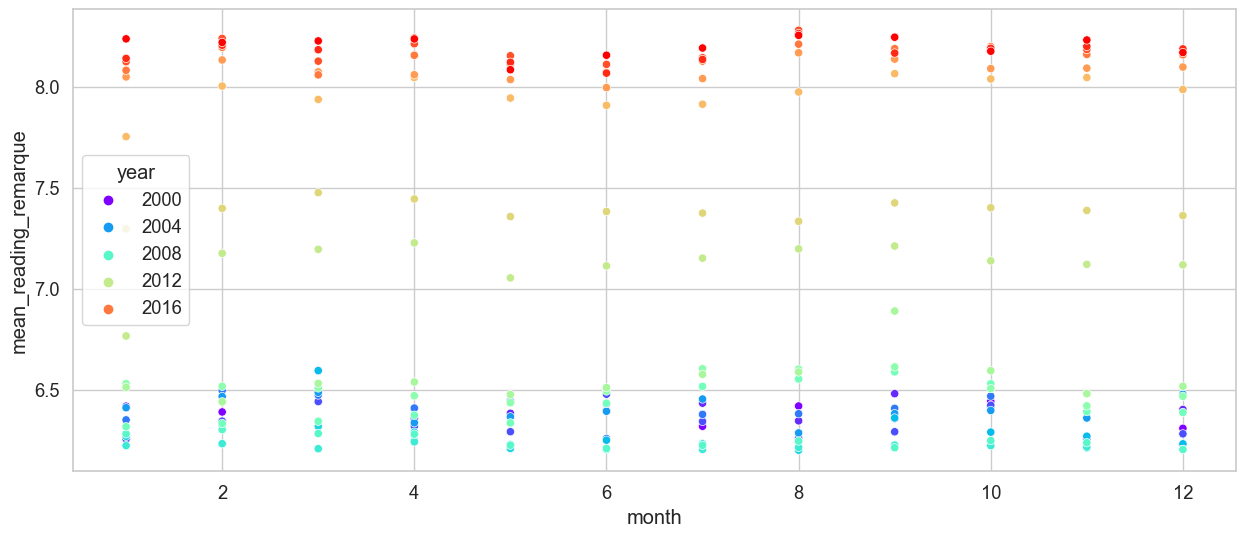

In [85]:
# Extract month and year from invoice_date column
merged_df_train['year'] = merged_df_train['invoice_date'].dt.year
merged_df_train['month'] = merged_df_train['invoice_date'].dt.month

# Filter the data for years 2000 to 2019
merged_df_train = merged_df_train[(merged_df_train['year'] >= 2000) & (merged_df_train['year'] <= 2019)]

# Group the data by month and year, and calculate the mean reading_remarque value for each group
df_month_year = merged_df_train.groupby(['year', 'month'])['reading_remarque'].mean().reset_index(name='mean_reading_remarque')

# Create scatter plot
fig, ax = plt.subplots(figsize=(15, 6))
sns.scatterplot(data=df_month_year, x='month', y='mean_reading_remarque', hue='year', palette='rainbow')

# Show the plot
plt.show()


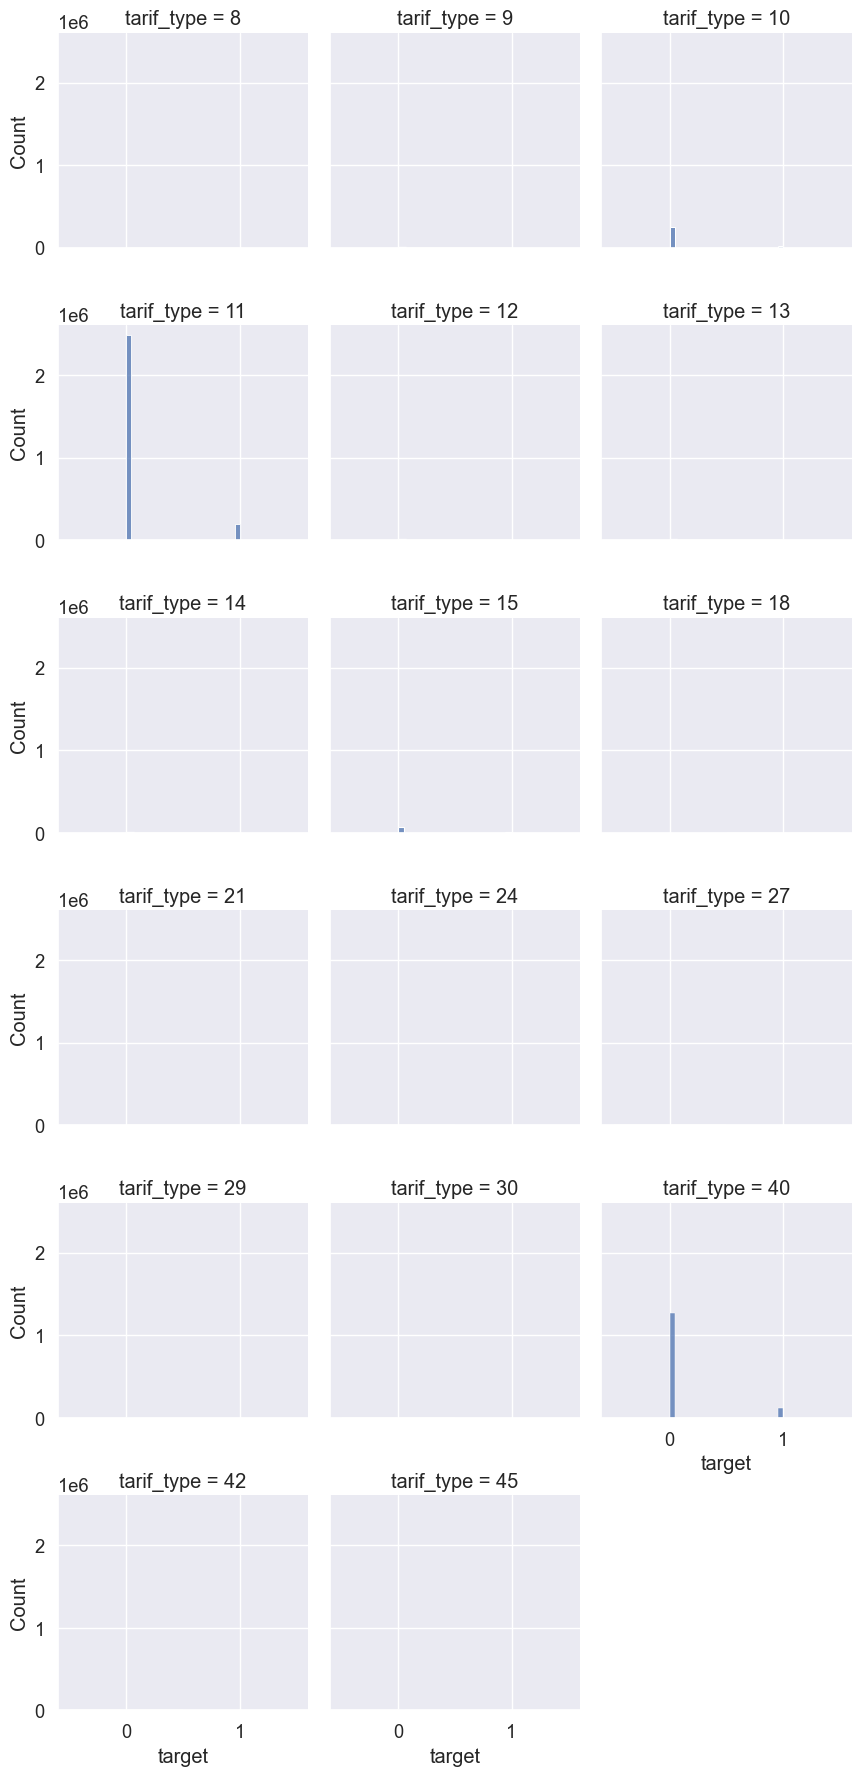

In [74]:

# Create a FacetGrid object
g = sns.FacetGrid(merged_df_train, col="tarif_type", col_wrap=3)

# Plot the target variable distribution
g.map(sns.histplot, "target")

# Show the plot
plt.show()


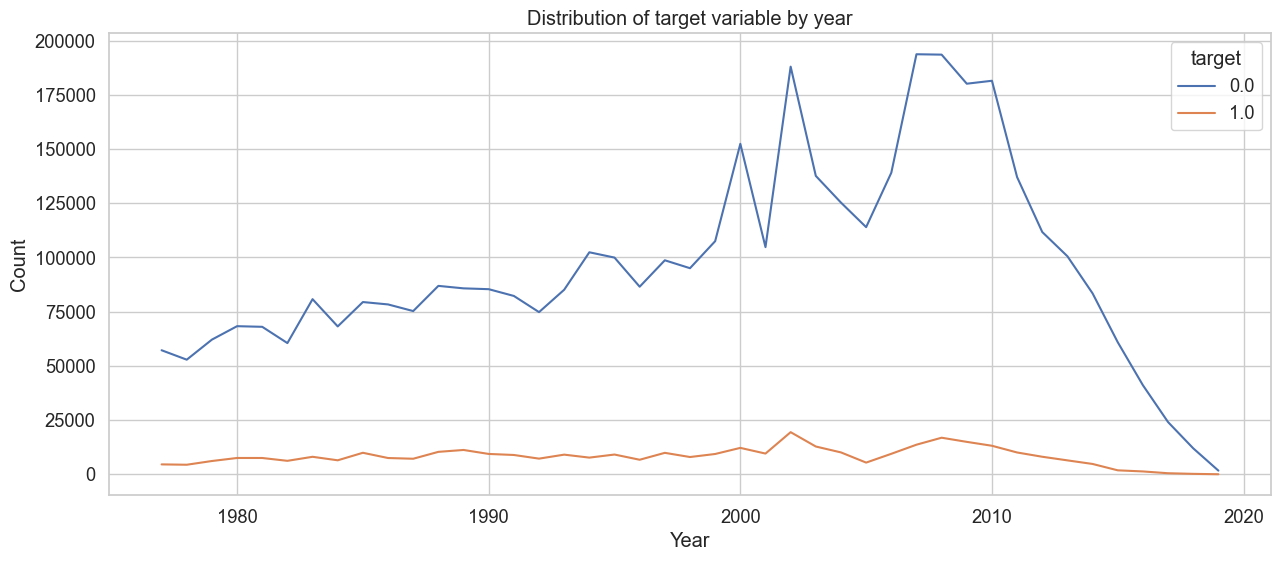

In [84]:

# Group the data by year and target, and count the number of occurrences
df_year_target = merged_df_train.groupby([merged_df_train.creation_date.dt.year, 'target'])['target'].count().reset_index(name='count')

# Plot the data using seaborn lineplot
sns.set_style("whitegrid")
plt.figure(figsize=(15, 6))
sns.lineplot(x='creation_date', y='count', hue='target', data=df_year_target)

# Set the title and axis labels
plt.title("Distribution of target variable by year")
plt.xlabel("Year")
plt.ylabel("Count")

# Show the plot
plt.show()


